In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
warnings.filterwarnings('ignore')

# menhhapus limit max column
pd.set_option('display.max_columns', None)

%matplotlib inline

# Load and Describe Data

-------------

## Load Data

In [2]:
dfraw = pd.read_csv('flight.csv')
dfraw.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [3]:
# Mengubah nama kolom menjadi lower case
dfraw.columns = dfraw.columns.str.lower()

**List Fitur pada Dataset**  

`member_no` : ID member  
`ffp_date` : Frequent Flyer Program join date  
`first_flight_date` : Tanggal penerbangan pertama  
`gender` : Jenis kelamin  
`ffp_tier` : Tier dari Frequent Flyer Program  
`work_city` : Kota asal  
`work_province` : Provinsi asal  
`work_country` : Negara asal  
`age` : Umur customer  
`load_time` : Tanggal data diambil  
`flight_count` : Jumlah penerbangan customer  
`bp_sum` : Rencana perjalanan  
`sum_yr_1` : Fare revenue  
`sum_yr_2` : Votes prices  
`seg_km_sum` : Total jarak(km) penerbangan yang sudah dilakukan  
`last_flight_date` : Tanggal penerbangan terakhir  
`last_to_end` : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir  
`avg_internal` : Rata-rata jarak waktu  
`max_interval` : Maksimal jarak waktu  
`exchange_count` : Jumlah penukaran  
`avg_discount` : Rata-rata discount yang didapat customer  
`points_sum` : Jumlah poin yang didapat customer  
`point_notflight` : Poin yang tidak digunakan oleh member

## Describe Data

In [4]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

1. Terdapat 23 fitur dengan 62988 baris data  
2. Fitur dengan keterangan waktu (date) dirasa perlu diubah dari tipe data object ke tipe data datetime  
3. Fitur `member_no` sebaiknya diubah dari tipe data numerik ke object karena angka yang dimaksud hanyalah sebagai ID, bukan operasi matematika.
4. Fitur `age` sebaiknya diubah dari tipe data float ke integer
5. Terdapat beberapa fitur yang memiliki null value 

In [5]:
# Mengubah tipe data int ke object
dfraw['member_no'] = dfraw['member_no'].astype(str)

Dikarenakan sebelumnya pada saat mengubah tipe data ke datetime terdapat error seperti dibawah,  
**ParserError: day is out of range for month: 2014/2/29  0:00:00 present at position 65**  

Maka, kita akan mengecek terlebih dahulu nilai yang dimaksud.

In [6]:
dfraw[dfraw.last_flight_date.str.contains('2014/2/29')]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Ternyata memang terdapat penulisan format tanggal yang berbeda pada fitur `last_flight_date`. Terdapat sebanyak 421 dari 62988 data atau hanya 0.006%, maka kita bisa menghapus baris error input ini.

In [7]:
dfraw.drop(dfraw[dfraw.last_flight_date.str.contains('2014/2/29')].index, inplace = True)

In [8]:
# Mengubah tipe data ke datetime
cols = ['ffp_date', 'first_flight_date', 'load_time','last_flight_date']
for col in cols:
    dfraw[col] = pd.to_datetime(dfraw[col])

In [9]:
# Mengecek null value
dfraw.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2255
work_province        3226
work_country           25
age                   419
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [10]:
dfraw.dtypes

member_no                    object
ffp_date             datetime64[ns]
first_flight_date    datetime64[ns]
gender                       object
ffp_tier                      int64
work_city                    object
work_province                object
work_country                 object
age                         float64
load_time            datetime64[ns]
flight_count                  int64
bp_sum                        int64
sum_yr_1                    float64
sum_yr_2                    float64
seg_km_sum                    int64
last_flight_date     datetime64[ns]
last_to_end                   int64
avg_interval                float64
max_interval                  int64
exchange_count                int64
avg_discount                float64
points_sum                    int64
point_notflight               int64
dtype: object

1. Terdapat 6 fitur, yaitu `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, dan `sum_yr_2` memiliki null value di dalamnya.
2. Semua fitur dirasa sudah tepat sesuai dengan tipe data nya.  
3. Untuk fitur `age`, dikarenakan terdapat NA values, maka tipe data akan diubah ketika sudah handle missing values. 

In [11]:
# Mengecek duplicated rows
dfraw.duplicated().sum()

0

In [12]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum', 'point_notflight']
cat = ['member_no','ffp_date', 'first_flight_date', 'gender', 'work_city', 'work_province', 'work_country', 'load_time', 'last_flight_date']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfraw[num].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62567.000,62148.000,62567.000,62567.000,62016.000,62429.000,62567.000,62567.000,62567.000,62567.000,62567.000,62567.000,62567.000,62567.000
mean,4.102,42.481,11.814,10906.692,5352.328,5588.828,17095.441,177.090,67.775,165.887,0.319,0.722,12524.516,2.727
std,0.374,9.887,14.052,16351.868,8116.830,8707.793,20974.465,184.058,77.607,123.394,1.137,0.185,20524.415,7.361
min,4.000,6.000,2.000,0.000,0.000,0.000,368.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,35.000,3.000,2509.000,1005.750,768.000,4732.000,29.000,23.333,79.000,0.000,0.612,2764.000,0.000
50%,4.000,41.000,7.000,5681.000,2800.000,2756.000,9959.000,109.000,44.643,143.000,0.000,0.712,6303.000,0.000
75%,4.000,48.000,15.000,12797.000,6567.000,6815.000,21206.000,269.000,82.000,227.000,0.000,0.810,14249.000,1.000
max,6.000,110.000,213.000,505308.000,239560.000,234188.000,580717.000,731.000,728.000,728.000,46.000,1.500,985572.000,140.000


Secara keseluruhan, dataset tidak memiliki distribusi data yang terlalu luas. Meskipun ada beberapa fitur yang memiliki nilai min-max yang sangat jauh, namun hal ini terkesan wajar jika kita bandingkan dengan kasus di dunia nyata dimana pasti ada orang-orang yang sering melakukan penerbangan dan di sisi lain juga ada orang-orang yang jarang melakukan penerbangan.  

Beberapa hal yang mungkin perlu perhatian adalah :  
1. Kebanyakan fitur numerik memiliki nilai Mean > Median dan nilai Min-Max yang cukup jauh  
2. Fitur `age` kelihatan tidak normal dimana nilai maksimum umur nya adalah 110 tahun  
3. Fitur `avg_discount` yang sepertinya juga tidak normal yaitu nilai maksimum nya 1.5 atau bisa diartikan 150% diskon.  
4. Fare revenue yang terlihat di fitur `sum_yr_1` dan `sum_yr_2` memiliki nilai 0. Hal ini perlu dianalisis lebih lanjut.

In [13]:
dfraw[cat].describe()

,member_no,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
count,62567,62567,62567,62564,60312,59341,62542,62567,62567
unique,62567,3068,3405,2,3225,1161,118,1,730
top,54993,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,1,183,96,47806,9326,17395,57347,62567,959
first,NaN,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2012-04-01 00:00:00
last,NaN,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2014-03-31 00:00:00


1. Kebanyakan data nya adalah data waktu (date/time) dimana hal tersebut pasti bervariasi yang menyebabkan unique value terhitung banyak. Namun hanya terdapat 1 unique value pada fitur load_time dimana hal tersebut merupakan tanggal data diambil, yaitu 3/31/2014.  
2. Kebanyakan penumpang berasal dari China dan berjenis kelamin laki-laki.  
3. Sudah dipastikan bahwa tidak ada data duplikat atau semua unique value dari `member_no` sudah sesuai.  
4. Output first dan last hanya terlihat untuk fitur yang bertipe datetime.

--------

# EDA (Exploratory Data Analysis

--------

## Univariate Analysis

### Check unique Values

In [14]:
dfraw['ffp_tier'].unique()

array([6, 5, 4], dtype=int64)

Ada 3 tipe tier, yaitu 4, 5, dan 6

In [15]:
dfraw['work_city'].unique()

array(['.', nan, 'Los Angeles', ..., 'BELLREGUARD', 'Danville',
       'lingshui'], dtype=object)

In [16]:
dfraw['work_province'].unique()

array(['beijing', 'CA', 'guizhou', ..., 'NOTARIO', 'TOPKPPI', 'JAWATIMUR'],
      dtype=object)

Terdapat fitur-fitur kategorical yang perlu dilakukan data cleansing berupa penyamarataan penulisan string.

### Distribusi Data

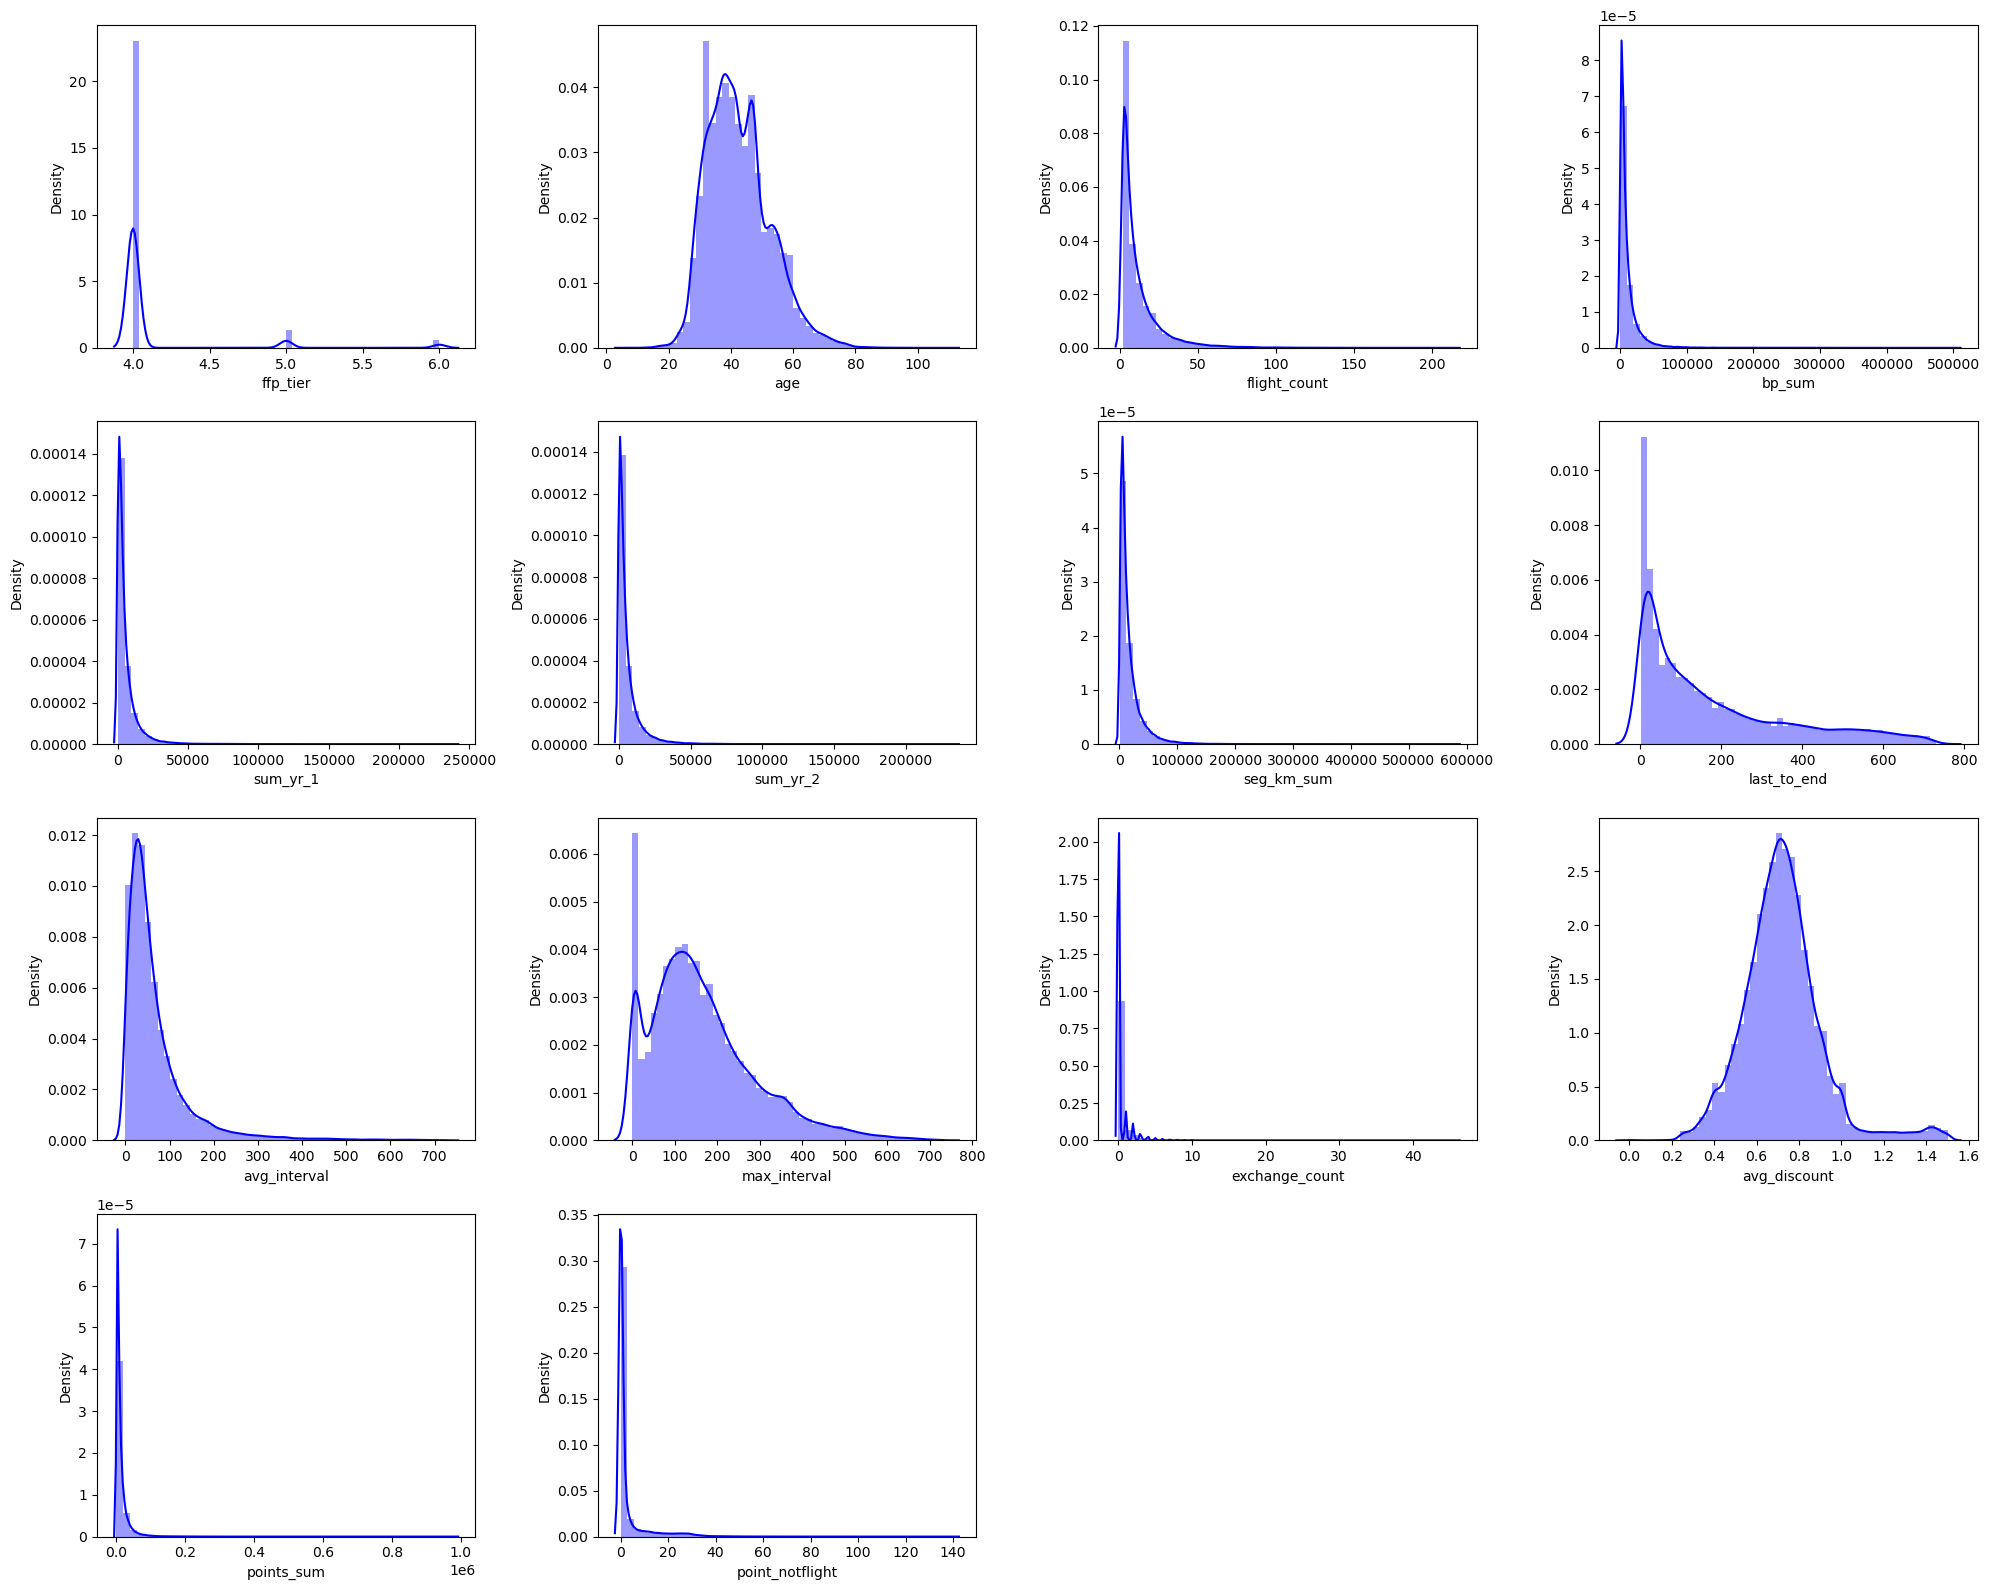

In [17]:
# Melihat grafik distribusi

plt.figure(figsize=(20, 16))
for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.distplot(dfraw[num[i]], color='blue')
    plt.tight_layout()

### Check Outliers

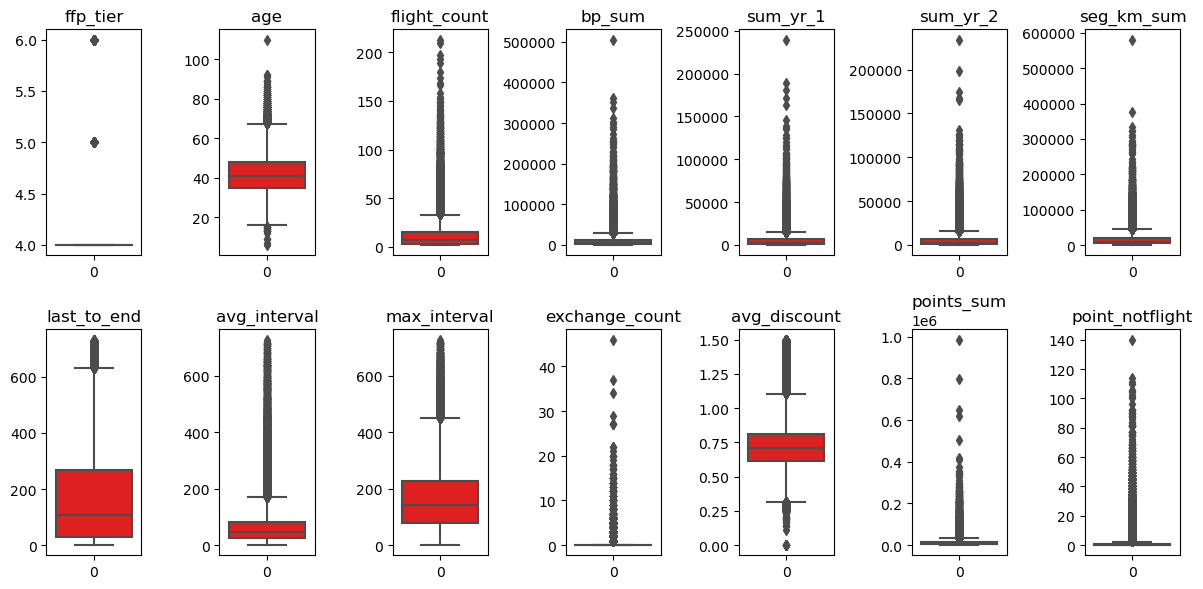

In [18]:
# Melihat penampilan outlier

plt.figure(figsize=(12, 6))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(dfraw[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

1. Fitur `ffp_tier` pada dasarnya tidak memiliki outlier dikarenakan hanya memiliki 3 nilai yaitu 4, 5, dan 6.  
2. Fitur lainnya memiliki distribusi right-skewed dan outliers.  
3. Hampir semua fitur memiliki outliers. Hal ini mungkin bisa ditangani dengan menghapus nilai ekstrim dan juga feature selection yang tepat.

### Abnormal Value

**1. Avg Discount**

Text(0.5, 1.0, 'Avg Discount')

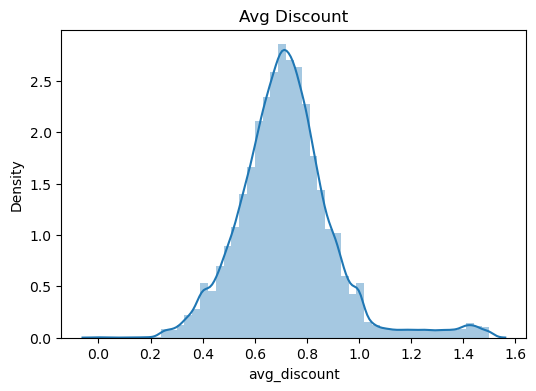

In [19]:
# Membuat Plot Avg_Diskon yang memiliki nilai terkesan janggal
plt.figure(figsize=(6, 4))
sns.distplot(dfraw.avg_discount)
plt.title('Avg Discount')

In [20]:
dfraw[dfraw['avg_discount'] > 1.0]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.000,2014-03-31,140,362480,171483.000,167434.000,293678,2014-03-25,7,5.194,17,29,1.252,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.000,2014-03-31,135,351159,163618.000,164982.000,283712,2014-03-21,11,5.299,18,20,1.255,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.000,2014-03-31,23,337314,116350.000,125500.000,281336,2013-12-26,97,27.864,73,11,1.091,372204,12
13,54943,2006-10-25,2007-10-27,Male,6,shenzhen,guangdong,CN,47.000,2014-03-31,118,241614,105466.000,119832.000,179514,2014-03-29,3,6.197,38,14,1.398,270704,20
15,1254,2008-03-28,2008-04-05,Male,4,BOWLAND HEIGHTS,CALIFORNIA,US,63.000,2014-03-31,22,286164,69300.000,54764.000,234721,2014-01-27,65,31.190,102,6,1.026,310002,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60394,47454,2005-11-22,2006-04-25,Female,4,LOWELL,MA,US,49.000,2014-03-31,4,2300,3174.000,0.000,1161,2012-10-28,521,62.000,182,0,1.024,2300,0
61606,51953,2012-08-09,2012-08-09,Male,4,RIYADH,SAUDIA,LA,51.000,2014-03-31,3,1650,2241.000,0.000,822,2012-08-10,600,0.500,1,0,1.166,1650,0
61792,35494,2009-03-05,2010-03-04,Male,4,beijing,beijing,CN,58.000,2014-03-31,2,1250,NaN,0.000,728,2012-07-17,624,3.000,3,0,1.250,1250,0
62168,46131,2007-03-01,2007-05-19,Male,4,NaN,NaN,TW,39.000,2014-03-31,2,869,0.000,1292.000,751,2013-06-05,301,4.000,4,0,1.090,869,0


In [21]:
dfraw[dfraw['avg_discount'] == 0.0]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
62980,1761,2012-08-07,2012-09-09,Female,4,shenzhen,guangdong,CN,29.000,2014-03-31,2,0,0.000,0.000,6138,2012-09-21,558,12.000,12,0,0.000,0,0
62981,15206,2011-12-02,2011-12-02,Female,4,guangzhou,guangdong,CN,42.000,2014-03-31,2,0,0.000,0.000,2158,2013-10-06,178,3.000,3,0,0.000,0,0
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.000,2014-03-31,2,0,0.000,0.000,3848,2013-01-20,437,0.000,0,0,0.000,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.000,2014-03-31,2,0,0.000,0.000,1134,2013-06-09,297,4.000,4,1,0.000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.000,2014-03-31,4,0,0.000,0.000,8016,2014-01-03,89,37.000,60,14,0.000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.000,2014-03-31,2,0,0.000,0.000,2594,2014-03-03,29,166.000,166,0,0.000,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36.000,2014-03-31,2,0,0.000,0.000,3934,2013-02-26,400,12.000,12,0,0.000,0,0
62987,61340,2013-02-17,2013-02-17,Female,4,shanghai,.,CN,29.000,2014-03-31,2,0,NaN,0.000,4222,2013-02-23,403,6.000,6,0,0.000,0,0


Mendapatkan diskon 100% saja mungkin jarang terdengar, terlebih lagi jika mendapatkan diskon lebih dari 100% (read: > 1.0). Terdapat 3684 customer yang mendapatkan diskon >=1. Jika kita mengasumsikan diskon didapat karena penerbangan-penerbangan yang mereka lakukan, maka juga tidak bisa dikatakan benar karena customer tersebut juga ada yang memiliki total poin rendah dan jarak waktu dari penerbangan terakhir yang cukup lama. Oleh karena itu, dikarenakan hanya terdapat (2927+8) dari 62k++ data (0.06%) maka data ini akan dianggap sebagai error input dan akan dihapus.  

Hal yang sama juga terkesan tidak wajar pada avg_discount yang 0, dimana total penerbangan nya (`seg_km_sum`) tidak 0 dan ada yang memiliki poin (`points_sum`). Maka, data-data ini akan dihapus karena dianggap tidak wajar dan error input.

**2. Age**

Text(0.5, 0, 'Age')

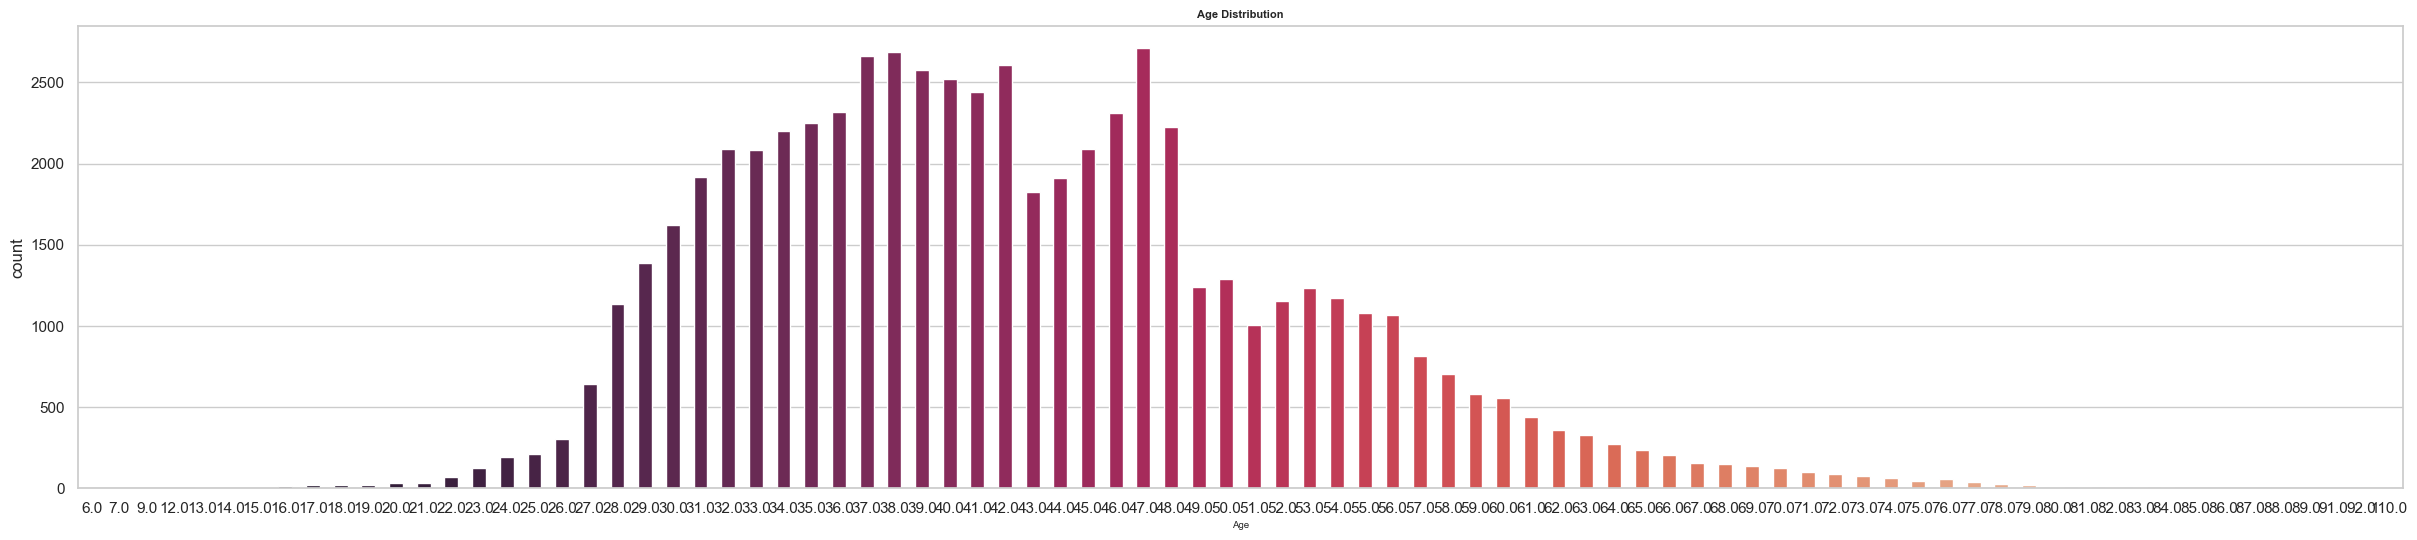

In [22]:
plt.figure(figsize=(30,6))
sns.set(style='whitegrid')
ax = sns.countplot(x='age', width = 0.5, data=dfraw, palette='rocket')
ax.set_title('Age Distribution', fontsize=8, fontweight='bold')
ax.set_xlabel('Age', fontsize=7, fontweight='medium')

In [23]:
dfraw[dfraw.age > 100]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110.000,2014-03-31,7,10895,6117.000,2888.000,14053,2013-04-06,361,50.333,214,1,0.741,11194,3


Customer yang berusia antara 28-56 tahun cenderung sering melakukan perjalanan menggunakan pesawat.  
Namun, juga tidak wajar jika ada customer yang berusia lebih dari 100 tahun, sehingga kita menganggap bahwa ini adalah error input yang masuk sebagai kategori outliers.

**3. Fare Revenue**

In [24]:
dfraw[(dfraw.sum_yr_1 == 0) & (dfraw.sum_yr_2 == 0) & (dfraw.seg_km_sum > 0)]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
4915,41807,2011-09-25,2011-09-25,Male,4,shenyang,liaoning,CN,45.000,2014-03-31,34,31971,0.000,0.000,47521,2013-06-19,287,12.848,54,1,0.725,31971,1
12761,17520,2011-05-02,2011-05-02,Female,4,wulumuqi,xinjiang,CN,57.000,2014-03-31,25,11519,0.000,0.000,33525,2013-09-30,184,18.083,55,0,0.544,12019,1
13382,41298,2011-03-30,2011-04-06,Male,4,dalian,liaoning,CN,44.000,2014-03-31,19,15934,0.000,0.000,19731,2013-08-05,240,26.889,61,3,0.889,15934,3
17337,13275,2009-10-10,2009-10-10,Female,4,shanghai,shanghai,CN,NaN,2014-03-31,17,9542,0.000,0.000,23035,2013-10-19,165,31.938,108,1,0.611,9542,3
18166,35602,2007-09-23,2007-09-23,Male,4,shenyang,liaoning,CN,38.000,2014-03-31,13,11929,0.000,0.000,17615,2013-11-24,129,40.083,162,1,0.765,11929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.000,2014-03-31,2,0,0.000,0.000,3848,2013-01-20,437,0.000,0,0,0.000,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.000,2014-03-31,2,0,0.000,0.000,1134,2013-06-09,297,4.000,4,1,0.000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.000,2014-03-31,4,0,0.000,0.000,8016,2014-01-03,89,37.000,60,14,0.000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.000,2014-03-31,2,0,0.000,0.000,2594,2014-03-03,29,166.000,166,0,0.000,0,0


Kita menemukan lagi indikasi error input dimana fare revenue `sum_yr_1`, `sum_yr_2` yang memiliki nilai 0 padahal penumpang melakukan perjalanan `seg_km_sum`. Hal ini tentu tidak wajar jika ada perjalanan namun tidak ada revenue. Dikarenakan terdapat 245 dari 52931 data (0.004%) data, maka kita akan menghapusnya.

## Multivariate Analysis

### Korelasi Fitur Numerik

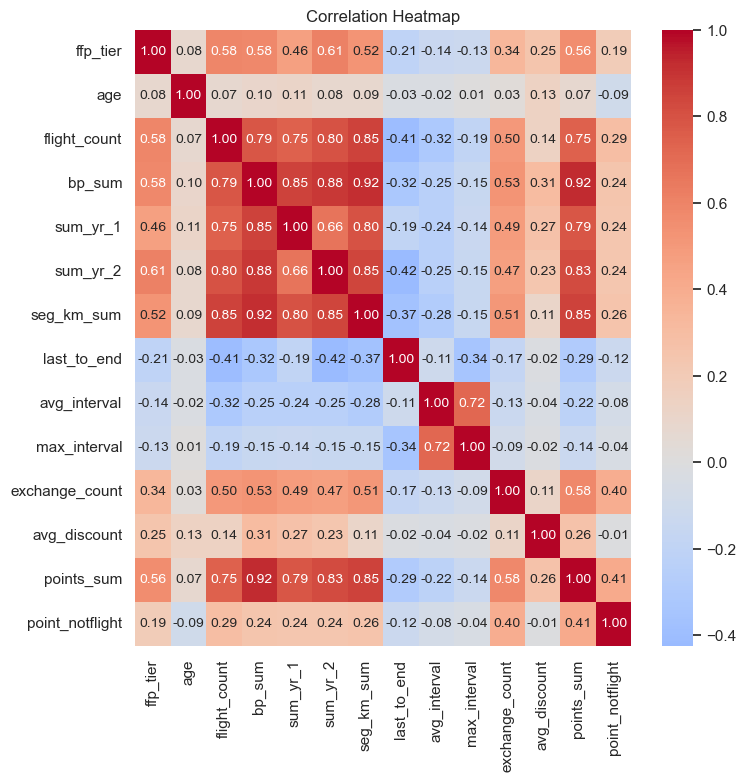

In [25]:
# Plot korelasi heatmap
corr_matrix = dfraw.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10}, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Fitur `age`, `last_to_end`, `avg_interval`, `max_interval`, `avg_discount`, `point_notflight` terlihat tidak memiliki korelasi yang kuat (<0.5)  
2. Fitur-fitur yang memiliki korelasi kuat yaitu `flight_count`, `bp_sum`, `sum_yr_1`, `sum_yr_2`, `seg_km_sum`, `points_sum`.  
3. Fitur `bp_sum`, `seg_km_sum`, dan `points_sum` memiliki korelasi yang sangat kuat, redundan.  

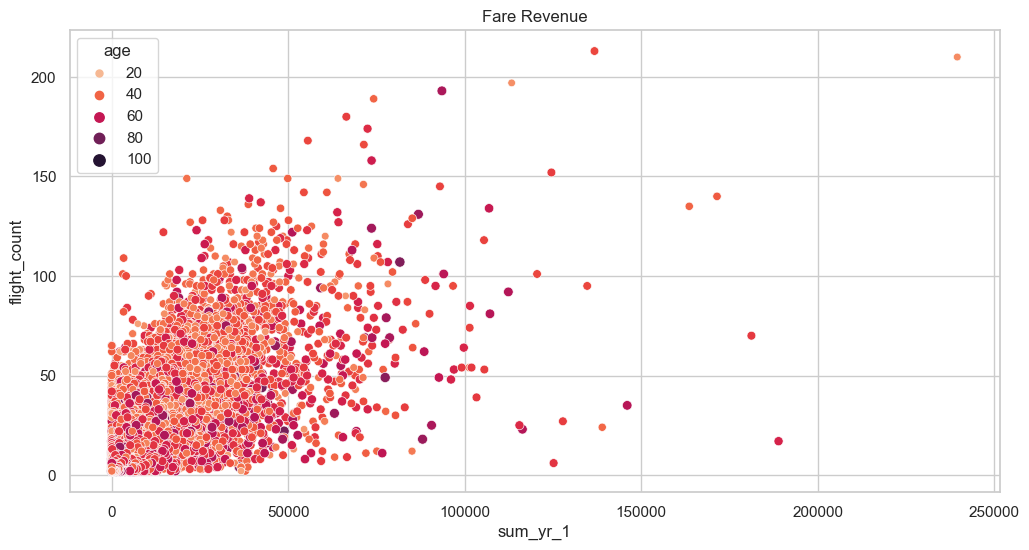

In [26]:
# Visualisasi Fare Revenue dari Jumlah Penerbangan Berdasarkan Total Poin

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=dfraw, x='sum_yr_1', y='flight_count', hue='age', size='age', palette='rocket_r')
plt.title('Fare Revenue')
plt.show()

1. Sama seperti analisis sebelumnya dimana umur customer yang aktif melakukan perjalanan adalah usian 20-an keatas hingga 60 tahun. 
2. Jumlah fare revenue yang didapat juga berbanding lurus dengan jumlah penerbangan yang dilakukan.  
3. Fare revenue yang sering didapatkan adalah dibawah 50000.

----------

# Data Preparation

----------

## Data Cleansing

### Dropping

**Duplicated Rows**

Pada tahap Data Exploration sebelumnya, terlihat bahwa tidak ada duplicate rows sehingga tidak perlu penanganan.

### Rows with Abnormal Value (Outliers)

Pada tahap sebelumnya kita sudah menandai fitur-fitur yang memiliki nilai tidak normal, sehingga perlu dilakukan pengecekan dan penanganan lebih lanjut dikarenakan dapat terindikasi sebagai outliers. Nilai-nilai tersebut adalah :  
1. `avg_discount` yang memiliki nilai 0 dan lebih dari 1.    
2. `age` yang berumur 110 atau lebih dari 100 tahun.  
3. `sum_yr_1` dan `sum_yr_2` yang memiliki fare revenue 0.

In [27]:
df_clean = dfraw.copy()

In [28]:
df_clean.head(3)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.000,2014-03-31,210,505308,239560.000,234188.000,580717,2014-03-31,1,3.483,18,34,0.962,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.000,2014-03-31,140,362480,171483.000,167434.000,293678,2014-03-25,7,5.194,17,29,1.252,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.000,2014-03-31,135,351159,163618.000,164982.000,283712,2014-03-21,11,5.299,18,20,1.255,406361,26


In [29]:
# Drop 0 avg_discount
nol_disc = df_clean[((df_clean.avg_discount == 0.0))].index
df_clean = df_clean.drop(nol_disc)

In [30]:
# Drop >1 avg_discount
satu_disc = df_clean[((df_clean.avg_discount > 1.0))].index
df_clean = df_clean.drop(satu_disc)

In [31]:
# Drop >100 age
abn_age = df_clean[((df_clean.age > 100))].index
df_clean = df_clean.drop(abn_age)

In [32]:
# Drop rows
abn_fare = df_clean[(df_clean.sum_yr_1 == 0) & (df_clean.sum_yr_2 == 0) & (df_clean.seg_km_sum > 0)].index
df_clean = df_clean.drop(abn_fare)

In [33]:
df_clean.shape

(59386, 23)

### Handle Missing Value

In [34]:
# Mengecek kembali null value
df_clean.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  1
ffp_tier                0
work_city            2087
work_province        2987
work_country           22
age                   385
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              541
sum_yr_2              134
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

Terdapat 7 fitur yang memiliki Null value, yaitu `gender`, `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, `sum_yr_2`. 
 
1. Fitur `gender` yang hanya memiliki 1 null value akan dihapus.
2. Fitur `work_city`, `work_province`, `work_country` akan diisi dengan nilai modus.  
2. `age` yang memiliki persebaran data yang lumayan normal, maka akan diisi dengan nilai mean. 
3. `sum_yr_1` dan `sum_yr_2` akan diisi dengan nilai median.

In [35]:
mode_value = df_clean.filter(['work_city', 'work_province', 'work_country']).mode()
cols = ['work_city', 'work_province', 'work_country']

df_clean[cols] = df_clean[cols].fillna(df_clean.mode().iloc[0])

In [36]:
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].mean())

In [37]:
df_clean['sum_yr_1'] = df_clean['sum_yr_1'].fillna(df_clean['sum_yr_1'].median())

In [38]:
df_clean['sum_yr_2'] = df_clean['sum_yr_2'].fillna(df_clean['sum_yr_2'].median())

In [39]:
df_clean.dropna(axis=0, inplace=True)
df_clean.isnull().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

In [40]:
df_clean['age'] = df_clean['age'].astype(int) 

## Feature Engineering

### Feature Extraction

#### Durasi Menjadi Member

Dibuat untuk mengetahui sudah berapa lama setiap user telah bergabung ke program FFP (Frequent Flyer Program) dengan menghitung jarak dari `load_time` (data diambil) dan `ffp_date` (kapan join).

In [41]:
df_clean['day_as_member'] = (df_clean['load_time'] - df_clean['ffp_date']).dt.days
df_clean.head(2)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,day_as_member
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.000,234188.000,580717,2014-03-31,1,3.483,18,34,0.962,619760,50,2706
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.000,130702.000,309928,2014-03-27,5,4.788,47,27,0.971,338813,39,1816


In [42]:
df_clean.shape

(59385, 24)

### Feature Selection

#### RFM ANALYSIS

Pada proses Feature Selection kali ini, akan dilakukan analisa RFM (Recency, Frequency, Monetary value) sebagai patokan dalam pemilihan fitur-fitur yang akan digunakan selanjutnya. <br>
* Recency mengacu pada waktu terakhir pengguna melakukan transaksi <br>
`last_to_end`: Dipilih karena berisi informasi mengenai selisih hari antara tainggal pengambilan data dengan tanggal penerbangan terakhir <br> <br>
* Frequency mengacu pada seberapa sering pengguna melakukan transaksi <br>
`flight_count` : Dipilih karena berisi data jumlah penerbangan yang telah dilakukan pengguna <br> <br>
* Monetary value mengacu pada seberapa banyak yang dikeluarkan tiap pengguna pada keseluruhan transaksi <br>
`seg_km_sum` : Dipilih karena memuat data total jarak penerbangan yang telah ditempuh setiap pengguna yang dapat menggambarkan banyaknya transaksi dan pengeluaran yang telah dikeluarkan, karena jarak sangat mempengaruhi biaya setiap tiket yang harus dikeluarkan.

#### OTHER CONSIDERATION

Selain dari fitur-fitur yang telah dipilih berdasarkan pada RFM Analysis, dipilih beberapa fitur tambahan yang dianggap memiliki pengaruh yang cukup besar, beberapa diantaranya : <br>
* `day_as_member` : Dipilih karena menunjukkan seberapa lama pengguna telah bergabung menjadi member
* `points_sum` : Dipilih karena berisi jumlah poin yang dimiliki oleh tiap pengguna yang pada umumnya diperoleh setiap melakukan transaksi

#### Handle Outliers 

In [43]:
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    nama_kolom = df.columns[column]
    jumlah_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    persentase_outliers = round(((jumlah_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Jumlah Outliers pada kolom ', nama_kolom, ' :', jumlah_outliers, ' dan persentase outliers:', persentase_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('periksa mode yang diinputkan')

In [44]:
# Memeriksa presentase outlier setiap kolom
column = [10, 14, 16, 21, 23]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Jumlah Outliers pada kolom  flight_count  : 4689  dan persentase outliers: 7.9 %
Jumlah Outliers pada kolom  seg_km_sum  : 4486  dan persentase outliers: 7.55 %
Jumlah Outliers pada kolom  last_to_end  : 1650  dan persentase outliers: 2.78 %
Jumlah Outliers pada kolom  points_sum  : 4987  dan persentase outliers: 8.4 %
Jumlah Outliers pada kolom  day_as_member  : 0  dan persentase outliers: 0.0 %


In [45]:
# Penghapusan Outlier
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 10, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 14, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 16, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 21, 'df').reset_index()['index'])]

print(f'Total baris setelah menghapus outlier: {len(df_clean)}')

Total baris setelah menghapus outlier: 49557


In [46]:
df_select = df_clean.copy()

In [47]:
df_select = df_select[['flight_count', 'seg_km_sum', 'last_to_end', 'points_sum', 'day_as_member']]
df_select.head(2)

,flight_count,seg_km_sum,last_to_end,points_sum,day_as_member
6879,13,36628,237,19305,2501
7066,18,31278,77,18330,550


## Normalisasi Data

In [48]:
from sklearn.preprocessing import StandardScaler

# Proses normalisasi Data
scaler = StandardScaler()
feat_std = scaler.fit_transform(df_select)

# Memasukkan hasil normalisasi ke dalam DataFrame df_std
for i, col in enumerate(df_select):
    df_select['std_' + col] = feat_std[:, i]

In [49]:
df_select.describe()

,flight_count,seg_km_sum,last_to_end,points_sum,day_as_member,std_flight_count,std_seg_km_sum,std_last_to_end,std_points_sum,std_day_as_member
count,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000
mean,7.508,10375.852,197.660,6310.093,1419.359,0.000,-0.000,0.000,-0.000,0.000
std,5.826,7785.334,184.374,4986.563,825.958,1.000,1.000,1.000,1.000,1.000
min,2.000,368.000,1.000,0.000,365.000,-0.946,-1.285,-1.067,-1.265,-1.277
25%,3.000,4175.000,44.000,2348.000,699.000,-0.774,-0.796,-0.833,-0.795,-0.872
50%,6.000,7989.000,136.000,4807.000,1197.000,-0.259,-0.307,-0.334,-0.301,-0.269
75%,10.000,14781.000,308.000,9181.000,2088.000,0.428,0.566,0.598,0.576,0.810
max,30.000,36650.000,700.000,21364.000,3437.000,3.861,3.375,2.725,3.019,2.443


In [50]:
df_std = df_select.copy()

In [51]:
# Menghapus Kolom 

df_std.drop(columns= ['last_to_end', 'flight_count', 'seg_km_sum', 'day_as_member', 'points_sum'], inplace= True)
df_std.head(3)

,std_flight_count,std_seg_km_sum,std_last_to_end,std_points_sum,std_day_as_member
6879,0.943,3.372,0.213,2.606,1.310
7066,1.801,2.685,-0.654,2.410,-1.053
7077,2.316,3.173,-0.378,2.776,-0.692


------------

# Clustering

------------

## Inertia Check

Text(0.5, 1.0, 'Visualisasi Inertia')

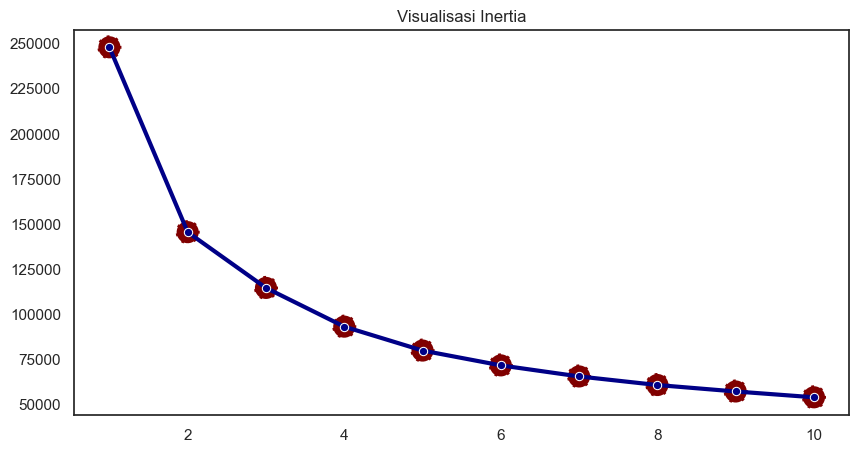

In [52]:
from sklearn.cluster import KMeans

# Mnghitung nilai inertia untuk 2 hingga 10 cluster
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

    
# Visualisasi inertia
sns.set_style('white')
plt.figure(figsize= (10, 5))
sns.lineplot(x= range(1, 11), y= inertia, marker='o', color = '#000087', linewidth = 3)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Visualisasi Inertia')

In [53]:
# Melihat perbedaan presentase inertia untuk setiap penambahan cluster

((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100).dropna()

0   41.371
1   21.282
2   18.778
3   14.277
4   10.327
5    8.595
6    7.292
7    5.914
8    5.676
dtype: float64

## Silhouette Score

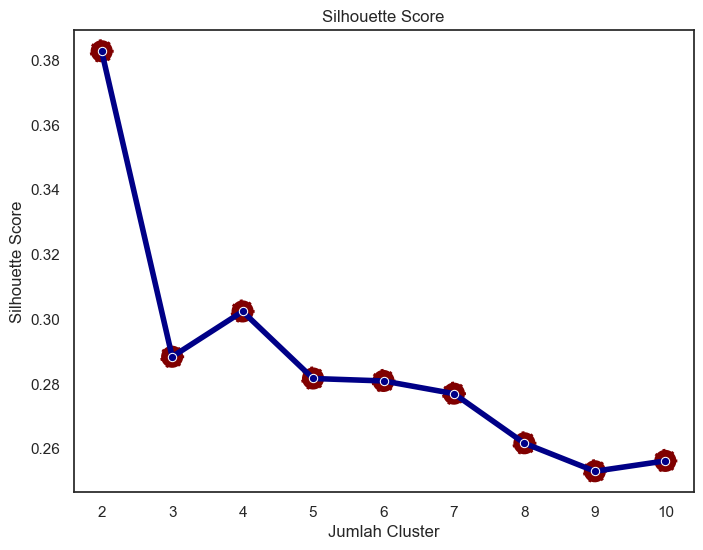

In [54]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score untuk 2 hingga 10 cluster
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    cluster_labels = kmeans.predict(df_std)
     
    score_euclidean = silhouette_score(df_std, cluster_labels, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

# Plot hasil Silhouette Score
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean,  marker='o', color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Dari hasil Silhouette score diatas, terlihat bahwa jumlah cluster yang optimal adalah 4 clusters.

## Clusters

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std) 

clusters = kmeans.labels_

## Evaluasi Cluster

In [56]:
# PCA dan Visualisasi Cluster yang Dihasilkan

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,3.793,0.809
1,3.842,-1.493
2,4.521,-1.233
3,4.421,-0.366
4,4.239,-1.121


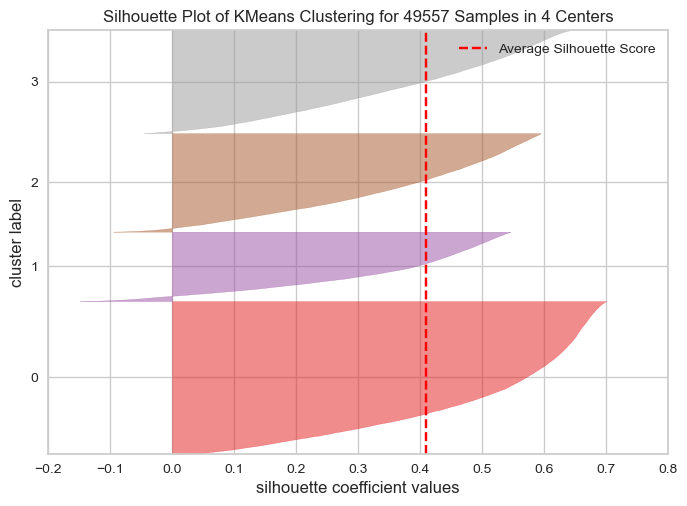

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 49557 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
# Visualisasi hasil cluster menggunakan Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_pca)    
visualizer.show()   

Dari gambar diatas terlihat bahwa seluruh clusters memiliki koefisien value yang bagus. Artinya model yang dibuat sudah sangat ideal.

In [58]:
df_pca['clusters'] = clusters
df_pca.sample(5)

,PC 1,PC 2,clusters
24923,-0.059,1.558,1
16153,0.255,1.309,1
24937,-0.478,-0.866,0
3452,3.326,-0.463,3
32594,-0.765,-0.093,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

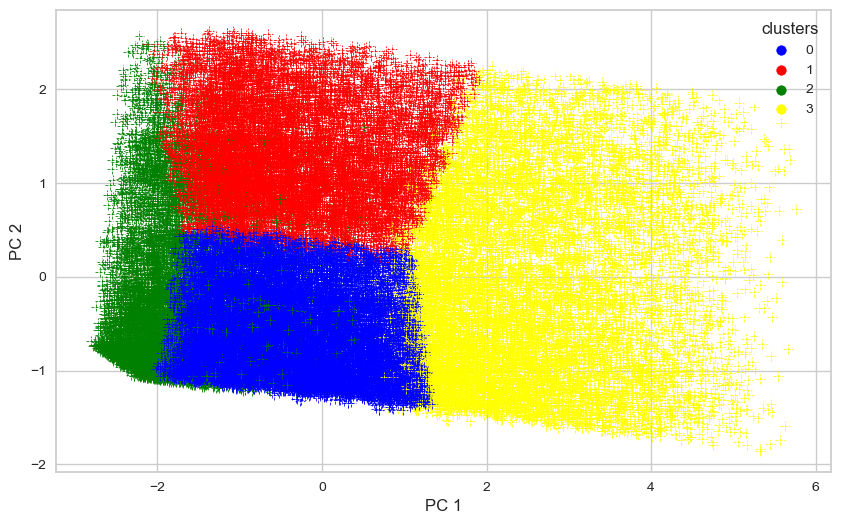

In [59]:
# Visualisasi persebaran cluster 

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    marker = '+',
    palette=['blue','red','green','yellow'],
    s=50,
    ax=ax
)

**Menempelkan Label Cluster ke Dataset**

In [60]:
# Assign cluster ke dataset 
df_clean.loc[:,'clusters'] = kmeans.labels_
df_clean.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,day_as_member,clusters
53913,13487,2009-12-14,2009-12-14,Male,4,guangzhou,guangdong,CN,30,2014-03-31,3,1381,564.000,1550.000,4052,2013-09-03,211,168.000,328,1,0.536,1381,1,1568,0
34830,39690,2008-09-29,2008-11-25,Female,4,guangzhou,guangdong,CN,49,2014-03-31,3,3421,0.000,4576.000,9639,2013-12-17,106,52.000,96,0,0.618,3421,0,2009,1
45004,53865,2006-06-24,2012-11-28,Female,4,HRB,guangdong,CN,47,2014-03-31,3,2203,3136.000,0.000,4682,2013-02-13,413,38.500,76,0,0.774,2203,0,2837,1
47578,55742,2012-02-22,2012-06-21,Male,4,yantai,shandong,CN,30,2014-03-31,4,3135,2832.000,608.000,3530,2013-12-07,116,178.000,309,0,0.896,3135,0,768,0
62917,42729,2012-08-01,2012-09-08,Male,4,wuhan,hubei,CN,47,2014-03-31,2,400,2720.000,0.000,958,2012-09-12,567,4.000,4,0,0.400,400,0,607,2


In [61]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,0,16716
1,3,11543
2,2,10849
3,1,10449


In [62]:
# Menampilkan statistik tiap cluster
df_select['clusters'] = clusters
display(df_select.groupby('clusters').agg(['min', 'max','mean','median']))

flight_count                   seg_km_sum                             \
                  min max   mean median        min    max      mean    median   
clusters                                                                        
0                   2  20  5.729  5.000        368  28608  7785.268  7205.500   
1                   2  24  5.608  5.000        368  26210  7750.332  7086.000   
2                   2  16  3.268  3.000        368  30250  4839.502  3941.000   
3                   2  30 15.791 15.000       4048  36650 21707.579 21008.000   

         last_to_end                      points_sum                   \
                 min  max    mean  median        min    max      mean   
clusters                                                                
0                  1  427 122.287 108.000          0  21331  4730.422   
1                  1  648 146.894 122.000          0  20947  4576.885   
2                223  700 483.086 484.000          0  21350  2914.052   
3                  1  696  84.500  49.000        413  21364 13358.498   

                   day_as_member                         std_flight_count  \
            median           min   max     mean   median              min   
clusters                                                                    
0         4270.500           365  1700  859.720  796.000           -0.946   
1         4021.000          1617  3437 2450.115 2403.000           -0.946   
2         2215.000           365  3429 1165.617  966.000           -0.946   
3        13003.000           365  3437 1535.222 1390.000           -0.946   

                             std_seg_km_sum                      \
           max   mean median            min   max   mean median   
clusters                                                          
0        2.144 -0.305 -0.431         -1.285 2.342 -0.333 -0.407   
1        2.831 -0.326 -0.431         -1.285 2.034 -0.337 -0.423   
2        1.458 -0.728 -0.774         -1.285 2.553 -0.711 -0.827   
3        3.861  1.422  1.286         -0.813 3.375  1.456  1.366   

         std_last_to_end                     std_points_sum               \
                     min   max   mean median            min   max   mean   
clusters                                                                   
0                 -1.067 1.244 -0.409 -0.486         -1.265 3.012 -0.317   
1                 -1.067 2.443 -0.275 -0.410         -1.265 2.935 -0.348   
2                  0.137 2.725  1.548  1.553         -1.265 3.016 -0.681   
3                 -1.067 2.703 -0.614 -0.806         -1.183 3.019  1.413   

                std_day_as_member                      
         median               min   max   mean median  
clusters                                               
0        -0.409            -1.277 0.340 -0.678 -0.755  
1        -0.459             0.239 2.443  1.248  1.191  
2        -0.821            -1.277 2.433 -0.307 -0.549  
3         1.342            -1.277 2.443  0.140 -0.036

## Tentang Clusters

Penjelasan masing-masing cluster adalah sbb :

#### Cluster 0 : 
Pelanggan dalam cluster ini lebih cenderung melakukan jumlah penerbangan yang stabil dengan rata - rata 5–6 penerbangan dengan jarak yang relatif pendek dan rata-rata 122 poin. Cluster ini memiliki masa keanggotaan yang tidak terlalu panjang atau bisa dikatakan baru bergabung diantara pelanggan cluster lainnya.

#### Cluster 1 :
Pelanggan dalam cluster ini memiliki ciri-ciri seperti cluster 0, namun rata-rata poin yang didapatkan lebih tinggi dari cluster 0 yaitu 146 poin. Pelanggan yang tergabung dalam cluster ini juga bukan anggota lama atau dapat dikatakan baru bergabung. Mungkin karena data yang tercatat baru sedikit (data penerbangan sejak program diinput) yang menyebabkan cluster 0 dan 1 masih belum memiliki jumlah penerbangan yang tinggi. 
Kedua cluster tersebut berpotensi untuk bisa diupgrade lagi dikarenakan jumlah penerbangan yang mereka lakukan cukup baik meskipun baru bergabung.

#### Cluster 2 :
Pelanggan yang tergolong pada cluster 2 adalah mereka yang melakukan perjalanan lebih sedikit dengan jarak yang relatif pendek pula, namun poin yang dimiliki tinggi. Selain itu, mereka sudah bergabung dengan program lebih lama dari cluster 0 dan 1. Artinya mereka memiliki loyalitas yang bagus karena tetap bergabung menjadi keanggotaan namun jarang melakukan perjalanan. 

#### Cluster 3 :
Pelanggan terbaik adalah pelanggan yang berada di cluster 3. CLuster ini memiliki jumlah penerbangan yang lebih tinggi dari cluster lainnya dengan rata-rata 15–16 kali penerbangan dengan jarak yang jauh pula. Besar kemungkinan pelanggan cluster ini sering melakukan perjalanan internasional. Selain itu jumlah poin yang mereka dapatkan juga tinggi karena mereka sudah lama bergabung menjadi keanggotaan.

## Rekomendasi Bisnis

#### Cluster 0 dan 1 (Potential Customers)  
Dikarenakan cluster 0 dan 1 merupakan potential customer dimana mereka sering melakukan perjalanan walaupun baru bergabung menjadi anggota, maka fokus peningkatan revenue lebih kearah mempertahankan mereka agar terus menjadi anggota dan memberikan reward yang menarik agar mereka tetap sering melakukan perjalanan.  Maka rekomendasi bisnis nya yaitu :   
**1. Birthday Coupon**  
Memberikan diskon penerbangan di bulan ulang tahun pelanggan hingga 15% sesuai dengan jumlah poin yang mereka dapatkan. Keuntungan lainnya adalah jika melakukan perjalanan tepat di hari ulang tahun, maka mereka akan mendapatkan double points.  
**2. Penukaran Poin**  
Setiap pelanggan yang telah mencapai jumlah poin tertentu, berkesempatan untuk menukar poin nya menjadi kupon belanja atau kupon penginapan di mitra perusahaan.          
**3. Afiliasi Paket Wisata** 
Menawarkan program afiliasi dimana pelanggan yang berhasil membawa minimal 2 orang menjadi anggota akan mendapatkan diskon harga paket wisata bersama orang yang mereka ajak.    

#### Cluster 2 (Loyal Customers)  
Dikarenakan cluster 2 merupakan cluster dimana pelanggan sudah cukup lama menjadi anggota namun sedkit melakukan perjalanan, maka fokus kita adalah bagaimana cara mereka agar sering melakukan perjalanan. Beberapa rekomendasi bisnis nya yaitu :  
**1.  Inactive Treatment**  
Pelanggan yang sudah tidak melakukan perjalanan hingga 6 bulan akan diberikan penawaran khusus dimana jika mereka melakukan perjalanan di antara batas waktu yang ditetapkan, maka mereka akan mendapatkan diskon sebesar 10% dan double points. Hal ini bertujuan agar meminimalisir pelanggan yang inactive.  
**2. Couple Package**  
Buat paket perjalanan khusus untuk 2 orang, baik bersama pasangan, sahabat, atau dengan yang lain. Masing-masing dari mereka akan mendapatkan diskon 5% dan double points. Hal ini bertujuan agar setiap hari nya banyak penumpang yang melakukan perjalanan.  
**3. Tour Package**  
Penawaran spesial untuk mereka yang melakukan perjalanan dan ingin berwisata. Mereka akan mendapatkan diskon khusus dan pelayanan yang baik dari mitra perusahaan.  

#### Cluster 3 (Exclusive Customers)  
Tentu saja pelanggan di cluster 3 ini adalah pelanggan eksklusif yang harus dijaga dengan baik. Mereka membelanjakan uang menggunakan layanan perusahaan sehingga fokus peningkatan bisnis nya adalah menjaga agar mereka terus menggunakan penerbangan perusahaan. Beberapa rekomendasi bisnisnya yaitu :  
**1. First Priority**  
Menjadikan pelanggan cluster ini sebagai prioritas utama, seperti misalnya prioritas kursi, makanan dan minuman gratis, dan diskon yang lebih besar dibanding cluster lainnya.  
**2. Luxury Service**  
Mempromosikan perjalanan international mewah. Tawarkan paket perjalanan mewah dengan fasilitas premium seperti akomodasi bintang lima, penerbangan kelas satu, dan layanan pribadi yang disesuaikan.  
**3. Half Price Refund**  
Keuntungan istimewa yang dimiliki cluster ini selain prioritas dan luxury service adalah berkesempatan untuk bisa refund 50% di hari yang sama dengan minimum jumlah poin tertentu.  

#### Untuk semua cluster** 
**1. Mengembangkan aplikasi seluler**  
Mengembangkan aplikasi seluler untuk mempermudah pelanggan dalam mengakses informasi penerbangan, poin, dan penawaran eksklusif yang hanya bisa optimal digunakan melalui aplikasi.  
**2. Gamification**  
Berikan peningkatan kelas atau fasilitas khusus kepada pelanggan yang telah mencapai poin tertentu untuk dapat menikmati promo atau diskon kecil.  
**3. Seasons Promotion**  
Rencanakan promosi musiman yang sesuai dengan liburan dan peristiwa khusus, seperti diskon hari raya keagamaan, penawaran khusus tahun baru, atau hari besar lainnya.